## Rishabh Sareen

In [5]:
# Import packages for calcs & visualisations

import numpy as np
import pandas as pd
import re

# For Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Data visualization
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Reading and importing the data

In [6]:
# Load Automobile dataset and display the 1st 5 rows
df = pd.read_csv('Auto_eda.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Display summarised data re dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# View Features
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
# Stats of the data set
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# 2. Missing data 

<AxesSubplot:>

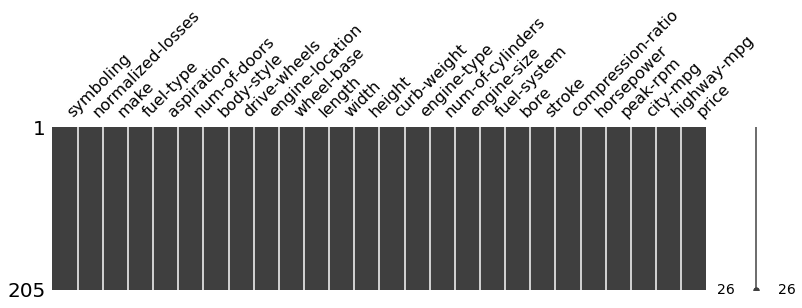

In [10]:
# Visualise missing data
missingno.matrix(df, figsize = (13,3))

In [11]:
# Number of missing data points per column
missing_values_count = df.isnull().sum()

# The no of missing points in the first ten columns
missing_values_count[0:15]

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
dtype: int64

In [12]:
# List of columns that contain a "?" for missing data
cols = list(df.columns)
for col in cols:
    if('?' in df[col].value_counts()):
        print(col + " - " + str(df[col].value_counts()['?']))

normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


In [13]:
# Cleaning the NORMALISED LOSSES field
# Find out number of records having 'NaN ""' value for normalized losses
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

41

In [14]:
# Setting the missing value to mean of normalized losses and convert the datatype to integer
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [15]:
# Cleaning the PRICE data
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [16]:
# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [17]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [18]:
# Cleaning the HORSEPOWER
# Checking the numeric and replacing with mean value and convert the datatype to integer
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',pmean).astype(int)

In [19]:
#Checking the outlier of horsepower
df.loc[df['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [20]:
#Excluding the Outlier data for horsepower
df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [21]:
# Cleaning BORE
# Find out the number of invalid values
df['bore'].loc[df['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [22]:
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [23]:
# Cleaning the STROKE
# Replace the non-number value to null and convert the datatype
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [24]:
# Cleaning the PEAK RPM
# Convert the non-numeric data to null and convert the datatype
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [25]:
# Cleaning the num-of-doors data
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df = df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

# 3. Visualization


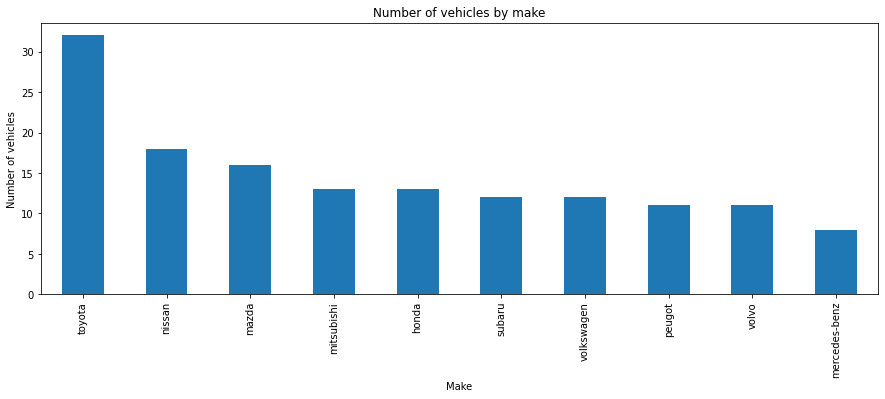

In [25]:
# Vehicle make frequency
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

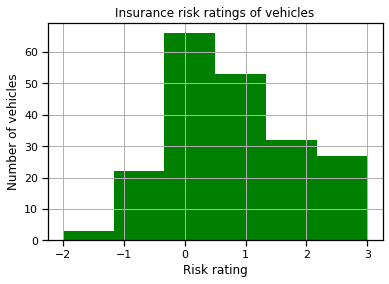

In [75]:
# Insurance risk ratings histogram
df.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

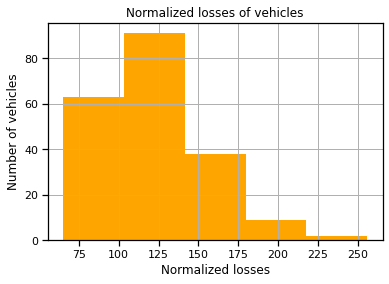

In [76]:
# Normalised losses Histogram
df['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

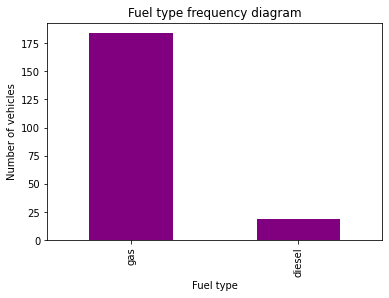

In [26]:
# Fuel type
df['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

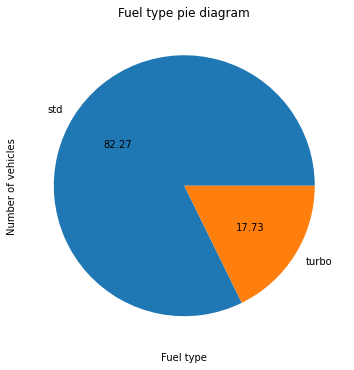

In [27]:
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

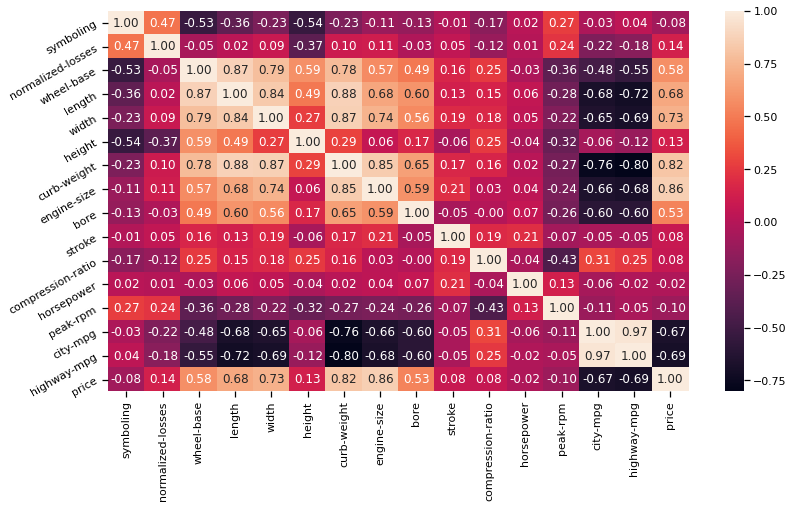

In [28]:
# Heatmap showing correlation between features
import seaborn as sns
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

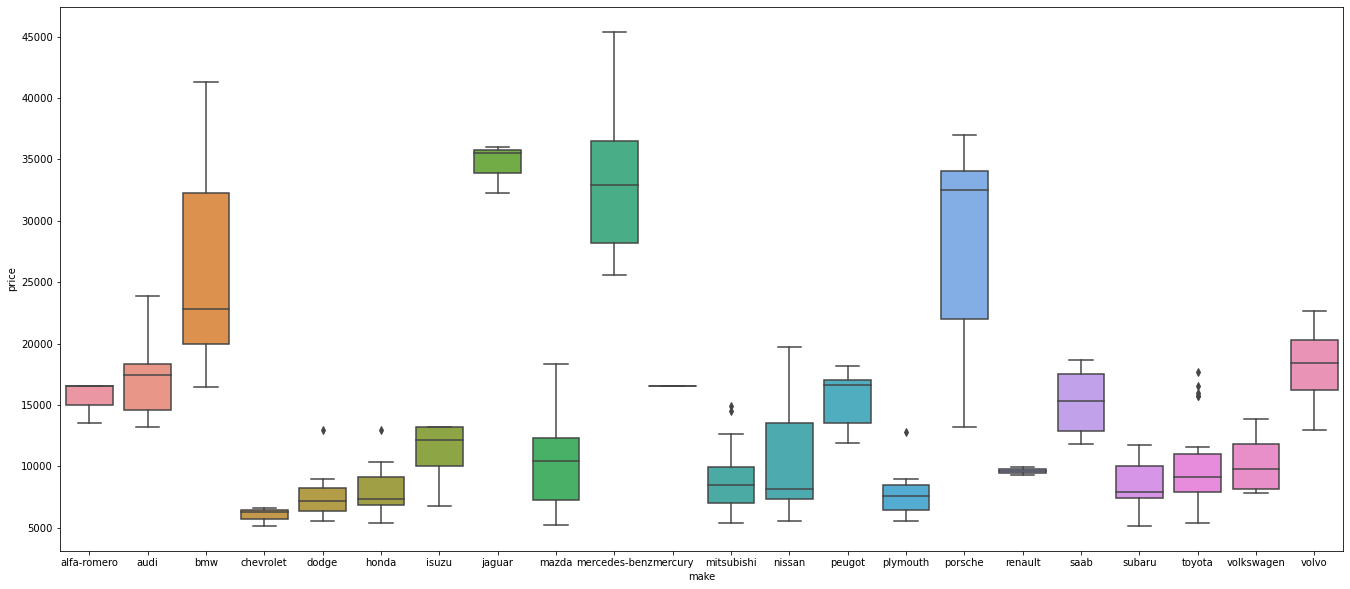

In [26]:
# Price and Make Box Plot
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

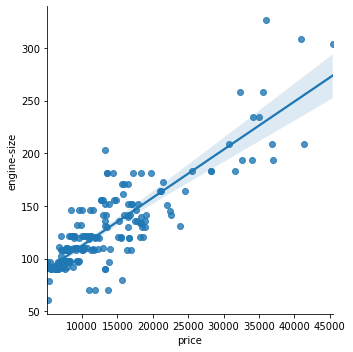

In [27]:
# Scatter plot of price and engine size
g = sns.lmplot('price',"engine-size", df);

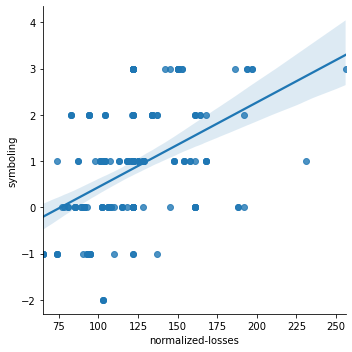

In [28]:
# Scatter plot of normalized losses and symboling
g = sns.lmplot('normalized-losses',"symboling", df);

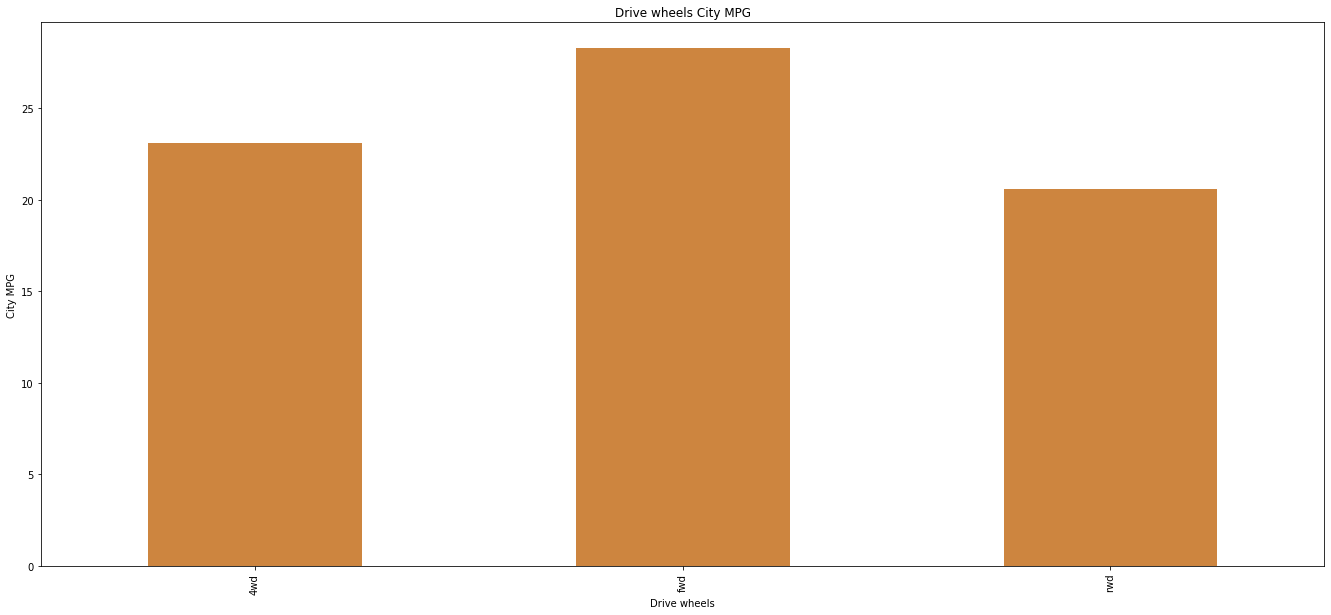

In [32]:
# Drive wheels and City MPG bar chart
df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

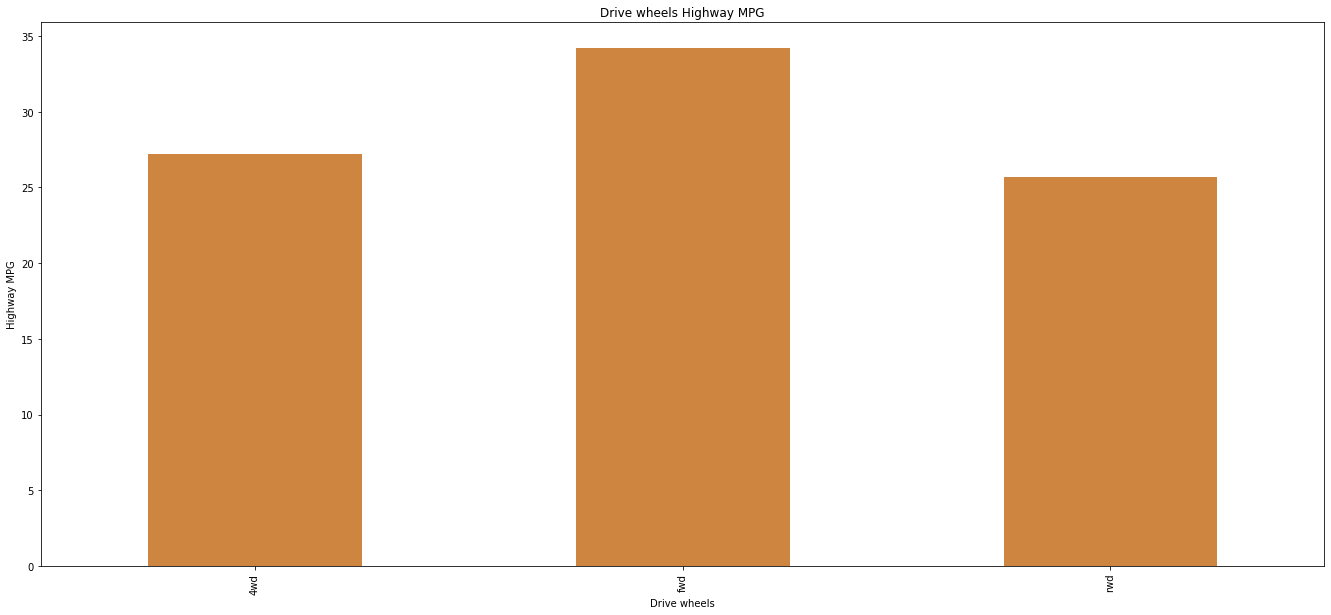

In [33]:
# Drive wheels and Highway MPG bar chart
df.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

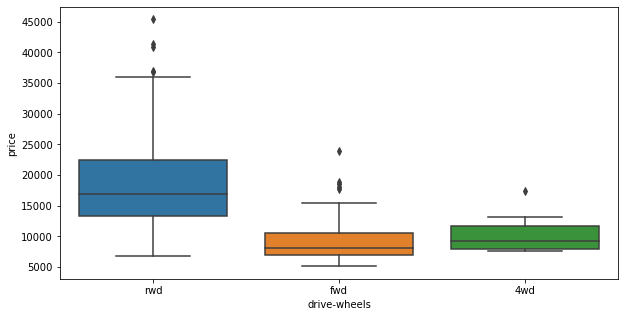

In [34]:
# Boxplot of Drive wheels and Price
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

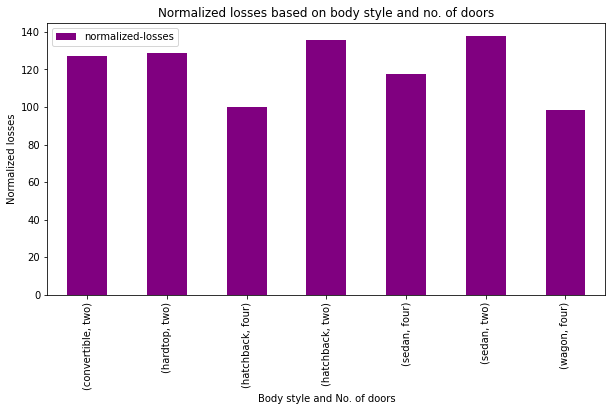

In [35]:
# Normalized losses based on body style and no. of doors
pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');